<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Ramki/E533_DLS_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install IPython
!pip install librosa
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
from IPython.display import Audio
import librosa
from google.colab import drive
import tensorflow as tf
from tensorflow.keras import backend as K
from librosa.core import stft,istft
from tensorflow.keras.layers import GRU,Dropout
from tensorflow.keras.layers import Conv1D,Conv2D,MaxPooling2D,Dropout,Dense,Flatten,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import os
import soundfile as sf
import math
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Q1: Data Augmentation

In [ ]:
cifar10 = tf.keras.datasets.cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
 X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1)
 print(X_train.shape)
 print(X_val.shape)
 print(Y_train.shape)
 print(Y_val.shape)

(45000, 32, 32, 3)
(5000, 32, 32, 3)
(45000, 1)
(5000, 1)


In [ ]:
def normalize_tensor(tensor): 
    tensor = tf.math.divide(
          tf.subtract(
              tensor, 
              tf.reduce_min(tensor)
          ), 
          tf.subtract(
              tf.reduce_max(tensor), 
              tf.reduce_min(tensor)
          )
        )
    return 2*tensor-1

In [ ]:
X_train_n2, X_val_n2 = X_train/255.0, X_val/ 255.0

In [ ]:
Y_train, Y_val = Y_train.flatten(), Y_val.flatten()
layer = tf.keras.layers.Normalization(mean=0, variance=1)
X_train_n1 = normalize_tensor(X_train)
X_val_n1 = normalize_tensor(X_val)

In [ ]:
he_initializer = tf.keras.initializers.HeUniform(seed=None)

In [ ]:
model = tf.keras.Sequential()
model.add(Conv2D(10, (5, 5), strides=(1,1), activation='relu', input_shape=(32, 32, 3),kernel_initializer=he_initializer))
model.add(MaxPooling2D((2, 2),strides=(2,2)))
model.add(Conv2D(10, (5, 5), activation='relu',kernel_initializer=he_initializer))
model.add(MaxPooling2D((2, 2),strides=2))
model.add(Flatten())
model.add(Dense(units=20,activation='relu',kernel_initializer=he_initializer))
model.add(Dense(units=10,activation='softmax',kernel_initializer=he_initializer))

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
r = model.fit(X_train_n1, Y_train, validation_data=(X_val_n1, Y_val), batch_size=256, epochs=150)

Epoch 1/150
176/176 [==============================] - 2s 9ms/step - loss: 2.0114 - accuracy: 0.2582 - val_loss: 1.6965 - val_accuracy: 0.3752
Epoch 2/150
176/176 [==============================] - 1s 7ms/step - loss: 1.5875 - accuracy: 0.4270 - val_loss: 1.5260 - val_accuracy: 0.4444
Epoch 3/150
176/176 [==============================] - 1s 7ms/step - loss: 1.4446 - accuracy: 0.4827 - val_loss: 1.4128 - val_accuracy: 0.4954
Epoch 4/150
176/176 [==============================] - 1s 8ms/step - loss: 1.3785 - accuracy: 0.5065 - val_loss: 1.3608 - val_accuracy: 0.5102
Epoch 5/150
176/176 [==============================] - 1s 7ms/step - loss: 1.3321 - accuracy: 0.5268 - val_loss: 1.3296 - val_accuracy: 0.5196
Epoch 6/150
176/176 [==============================] - 1s 7ms/step - loss: 1.2956 - accuracy: 0.5390 - val_loss: 1.2860 - val_accuracy: 0.5420
Epoch 7/150
176/176 [==============================] - 1s 7ms/step - loss: 1.2660 - accuracy: 0.5519 - val_loss: 1.2636 - val_accuracy: 0.5502

In [ ]:
aug_x_train1 = np.minimum(1.1*X_train_n2, 1)
aug_x_train1 = normalize_tensor(aug_x_train1)
aug_x_train2 = 0.9*X_train_n2
aug_x_train2 = normalize_tensor(aug_x_train2)
aug_x_train3 = tf.image.flip_left_right(X_train_n2)
aug_x_train3 = normalize_tensor(aug_x_train3)
aug_x_train4 = X_train_n2
aug_x_train4 = normalize_tensor(aug_x_train4)

In [ ]:
X_train_aug = tf.concat([aug_x_train1,aug_x_train2,aug_x_train3,aug_x_train4],0)

In [ ]:
X_train_aug.shape

TensorShape([180000, 32, 32, 3])

In [ ]:
Y_train_aug = tf.concat([Y_train,Y_train,Y_train,Y_train],0)

In [ ]:
X_train_n1 = X_train_aug
X_val_n1 = normalize_tensor(X_val)

In [ ]:
model1 = tf.keras.Sequential()
model1.add(Conv2D(10, (5, 5), strides=(1,1), activation='relu', input_shape=(32, 32, 3),kernel_initializer=he_initializer))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(10, (5, 5), activation='relu',kernel_initializer=he_initializer))
model1.add(MaxPooling2D((2, 2),strides=2))
model1.add(Flatten())
model1.add(Dense(units=20,activation='relu',kernel_initializer=he_initializer))
model1.add(Dense(units=10,activation='softmax',kernel_initializer=he_initializer))

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
r1 = model1.fit(X_train_n1, Y_train_aug, validation_data=(X_val_n1, Y_val), batch_size=512, epochs=150)

Epoch 1/150
352/352 [==============================] - 14s 14ms/step - loss: 1.7972 - accuracy: 0.3437 - val_loss: 1.4565 - val_accuracy: 0.4766
Epoch 2/150
352/352 [==============================] - 4s 13ms/step - loss: 1.3697 - accuracy: 0.5096 - val_loss: 1.3170 - val_accuracy: 0.5250
Epoch 3/150
352/352 [==============================] - 5s 13ms/step - loss: 1.2667 - accuracy: 0.5506 - val_loss: 1.2556 - val_accuracy: 0.5476
Epoch 4/150
352/352 [==============================] - 5s 14ms/step - loss: 1.2061 - accuracy: 0.5736 - val_loss: 1.2058 - val_accuracy: 0.5756
Epoch 5/150
352/352 [==============================] - 5s 14ms/step - loss: 1.1581 - accuracy: 0.5915 - val_loss: 1.1630 - val_accuracy: 0.5908
Epoch 6/150
352/352 [==============================] - 5s 14ms/step - loss: 1.1190 - accuracy: 0.6061 - val_loss: 1.1409 - val_accuracy: 0.5994
Epoch 7/150
352/352 [==============================] - 5s 14ms/step - loss: 1.0896 - accuracy: 0.6171 - val_loss: 1.1292 - val_accuracy

In [ ]:
val_acc1 = r.history['val_accuracy']
val_acc2 = r1.history['val_accuracy']

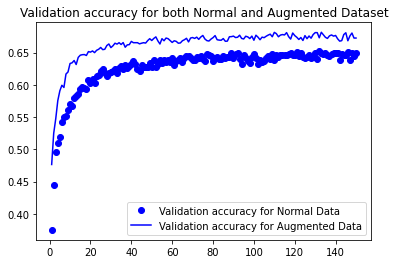

In [ ]:
epochs = range(1, 151)

plt.figure()
plt.plot(epochs, val_acc1, 'bo', label='Validation accuracy for Normal Data')
plt.plot(epochs, val_acc2, 'b', label='Validation accuracy for Augmented Data')
plt.title('Validation accuracy for both Normal and Augmented Dataset')
plt.legend()

plt.show()

Q2: Self-Supervised Learning via Pretext Tasks 

In [ ]:
cifar10 = tf.keras.datasets.cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
labelled_X_train,unlabelled_X_train = x_train[49500:50000],x_train[0:49500]
labelled_Y_train,unlabelled_Y_train = y_train[49500:50000],y_train[0:49500]

In [ ]:
labelled_X_train = tf.convert_to_tensor(labelled_X_train)
unlabelled_X_train = tf.convert_to_tensor(unlabelled_X_train)
labelled_Y_train = tf.convert_to_tensor(labelled_Y_train)
unlabelled_Y_train = tf.convert_to_tensor(unlabelled_Y_train)
x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)

In [ ]:
labelled_X_train = normalize_tensor(labelled_X_train)
unlabelled_X_train = normalize_tensor(unlabelled_X_train)
x_test = normalize_tensor(x_test)

In [ ]:
print(labelled_X_train.shape)
print(unlabelled_X_train.shape)

(500, 32, 32, 3)
(49500, 32, 32, 3)


In [ ]:
print(y_train[0:49500].shape)

(49500, 1)


In [ ]:
Y_train0 = tf.zeros(shape = y_train[0:49500].shape,dtype=tf.int32)

In [ ]:
X_train_upside_down = tf.image.flip_up_down(unlabelled_X_train)
Y_train1 = tf.ones(shape=y_train[0:49500].shape,dtype=tf.int32)
X_train_rotated_ccwise = tf.image.rot90(unlabelled_X_train)
Y_train2 = 2*tf.ones(shape=y_train[0:49500].shape,dtype=tf.int32)

In [ ]:
X_train_aug = tf.concat([unlabelled_X_train,X_train_upside_down,X_train_rotated_ccwise],0)
Y_train_aug = tf.concat([Y_train0,Y_train1,Y_train2],0)

In [ ]:
print(X_train_aug.shape)
print(Y_train_aug.shape)

(148500, 32, 32, 3)
(148500, 1)


In [ ]:
he_initializer = tf.keras.initializers.HeUniform(seed=None)
def create_model():
    model = tf.keras.Sequential()
    model.add(Conv2D(10, (5, 5), strides=(1,1), activation='relu', name='layer1',input_shape=(32, 32, 3),kernel_initializer=he_initializer))
    model.add(MaxPooling2D((2, 2),name='layer2',strides=(2,2)))
    model.add(Conv2D(10, (5, 5), activation='relu',name='layer3',kernel_initializer=he_initializer))
    model.add(MaxPooling2D((2, 2),name='layer4',strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=20,activation='relu',name='layer5',kernel_initializer=he_initializer))
    model.add(Dense(units=3,activation='softmax',name='naaa',kernel_initializer=he_initializer))
    return model

In [ ]:
model = create_model()
cce = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='adam',
                loss=cce,
                metrics=[tf.keras.metrics.SparseCategoricalCrossentropy(),tf.keras.metrics.SparseCategoricalAccuracy()])

In [15]:
checkpoint_path = "/content/drive/MyDrive/DLS_DATA/training/cp-{epoch:02d}.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [16]:
batch_size = 256
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_freq=10*batch_size,
                                                 verbose=1)

In [ ]:
model.fit(X_train_aug, 
          Y_train_aug,  
          epochs=100,
          verbose=1,
          batch_size=batch_size,
          callbacks=[cp_callback])

Epoch 1/100
581/581 [==============================] - 4s 6ms/step - loss: 0.8597 - sparse_categorical_crossentropy: 0.8597 - sparse_categorical_accuracy: 0.5930
Epoch 2/100
581/581 [==============================] - 3s 5ms/step - loss: 0.7615 - sparse_categorical_crossentropy: 0.7615 - sparse_categorical_accuracy: 0.6571
Epoch 3/100
581/581 [==============================] - 3s 5ms/step - loss: 0.7251 - sparse_categorical_crossentropy: 0.7251 - sparse_categorical_accuracy: 0.6792
Epoch 4/100
581/581 [==============================] - 3s 5ms/step - loss: 0.7039 - sparse_categorical_crossentropy: 0.7039 - sparse_categorical_accuracy: 0.6893
Epoch 5/100
228/581 [==========>...................] - ETA: 1s - loss: 0.6856 - sparse_categorical_crossentropy: 0.6856 - sparse_categorical_accuracy: 0.6989
Epoch 5: saving model to /content/drive/MyDrive/DLS_DATA/training/cp-05.hdf5
581/581 [==============================] - 4s 6ms/step - loss: 0.6870 - sparse_categorical_crossentropy: 0.6870 - spa

In [ ]:
os.listdir(checkpoint_dir)

['cp-88.hdf5',
 '.ipynb_checkpoints',
 'cp-111.hdf5',
 'cp-133.hdf5',
 'cp-155.hdf5',
 'cp-177.hdf5',
 'cp-199.hdf5',
 'cp-03.hdf5',
 'cp-07.hdf5',
 'cp-16.hdf5',
 'cp-20.hdf5',
 'cp-25.hdf5',
 'cp-29.hdf5',
 'cp-38.hdf5',
 'cp-42.hdf5',
 'cp-47.hdf5',
 'cp-51.hdf5',
 'cp-60.hdf5',
 'cp-64.hdf5',
 'cp-69.hdf5',
 'cp-73.hdf5',
 'cp-82.hdf5',
 'cp-86.hdf5',
 'cp-91.hdf5',
 'cp-95.hdf5',
 'cp-02.hdf5',
 'cp-01.hdf5',
 'cp-04.hdf5',
 'cp-08.hdf5',
 'cp-12.hdf5',
 'cp-17.hdf5',
 'cp-21.hdf5',
 'cp-26.hdf5',
 'cp-30.hdf5',
 'cp-34.hdf5',
 'cp-39.hdf5',
 'cp-43.hdf5',
 'cp-48.hdf5',
 'cp-52.hdf5',
 'cp-56.hdf5',
 'cp-61.hdf5',
 'cp-65.hdf5',
 'cp-70.hdf5',
 'cp-74.hdf5',
 'cp-78.hdf5',
 'cp-83.hdf5',
 'cp-87.hdf5',
 'cp-92.hdf5',
 'cp-96.hdf5',
 'cp-100.hdf5',
 'baseline_model_logs.txt',
 'cp-05.hdf5',
 'cp-09.hdf5',
 'cp-14.hdf5',
 'cp-18.hdf5',
 'cp-23.hdf5',
 'cp-27.hdf5',
 'cp-31.hdf5',
 'cp-36.hdf5',
 'cp-40.hdf5',
 'cp-45.hdf5',
 'cp-49.hdf5',
 'cp-53.hdf5',
 'cp-58.hdf5',
 'cp-62.hdf5'

In [ ]:
latest = '/content/drive/MyDrive/DLS_DATA/training/cp-89.hdf5'

In [ ]:
# Create a new model instance
model = create_model()

# Load the previously saved weights
model.load_weights(latest)

# Re-evaluate the model
# loss, acc = model.evaluate(test_images, test_labels, verbose=2)

Baseline Model:

In [ ]:
import sys
from contextlib import redirect_stdout

In [ ]:
log_path1 = "/content/drive/MyDrive/DLS_DATA/training/baseline_model_logs.txt"
log_path2 = "/content/drive/MyDrive/DLS_DATA/training/finetune_model_logs.txt"

class print_epochs(tf.keras.callbacks.Callback):
  def __init__(self,log_path):
      self.log_path = log_path
  def on_epoch_end(self, epoch, logs=None):
    with open(self.log_path, 'a') as writefile: # put log_path here
      with redirect_stdout(writefile):
        if(int(epoch) % 100) == 0:
          print("Epoch: {:>3} | Loss: ".format(epoch) + f"{logs['loss']:.4e}" + " | Valid loss: " + f"{logs['val_loss']:.4e}")
          writefile.write("Epoch: {:>3} | Loss: ".format(epoch) + f"{logs['loss']:.4e}" + " | Valid loss: " + f"{logs['val_loss']:.4e}")
          writefile.write("\n")
    

In [ ]:
he_initializer = tf.keras.initializers.HeUniform(seed=None)
model1 = tf.keras.Sequential()
model1.add(Conv2D(10, (5, 5), strides=(1,1), activation='relu', name='layer1',input_shape=(32, 32, 3),kernel_initializer=he_initializer))
model1.add(MaxPooling2D((2, 2),name='layer2',strides=(2,2)))
model1.add(Conv2D(10, (5, 5), activation='relu',name='layer3',kernel_initializer=he_initializer))
model1.add(MaxPooling2D((2, 2),name='layer4',strides=(2,2)))
model1.add(Flatten())
model1.add(Dense(units=20,activation='relu',name='layer5',kernel_initializer=he_initializer))
model1.add(Dense(units=10,activation='softmax',name='naaa',kernel_initializer=he_initializer))
cce = tf.keras.losses.SparseCategoricalCrossentropy()
model1.compile(optimizer='adam',
                loss=cce,
                metrics=[tf.keras.metrics.SparseCategoricalCrossentropy(),tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
p_e = print_epochs(log_path1)
batch_size = 256
history1 = model1.fit(labelled_X_train, 
          labelled_Y_train,  
          epochs=10000,
          validation_data = (x_test, y_test),
          verbose=1,
          batch_size=batch_size,
          callbacks=[p_e])

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 339ms/step - loss: 5.9843e-08 - sparse_categorical_crossentropy: 5.9843e-08 - sparse_categorical_accuracy: 1.0000 - val_loss: 4866.7505 - val_sparse_categorical_crossentropy: 4866.7505 - val_sparse_categorical_accuracy: 0.1642
Epoch 7502/10000
2/2 [==============================] - 0s 345ms/step - loss: 5.9605e-08 - sparse_categorical_crossentropy: 5.9605e-08 - sparse_categorical_accuracy: 1.0000 - val_loss: 4867.0913 - val_sparse_categorical_crossentropy: 4867.0913 - val_sparse_categorical_accuracy: 0.1641
Epoch 7503/10000
2/2 [==============================] - 0s 188ms/step - loss: 6.0320e-08 - sparse_categorical_crossentropy: 6.0320e-08 - sparse_categorical_accuracy: 1.0000 - val_loss: 4867.0122 - val_sparse_categorical_crossentropy: 4867.0122 - val_sparse_categorical_accuracy: 0.1641
Epoch 7504/10000
2/2 [==============================] - 0s 337ms/step - loss: 5.9128e-08 - sparse_categorica

In [ ]:
model = tf.keras.Sequential()
model.add(Conv2D(10, (5, 5), strides=(1,1), activation='relu', name='layer1',input_shape=(32, 32, 3),kernel_initializer=he_initializer))
model.add(MaxPooling2D((2, 2),name='layer2',strides=(2,2)))
model.add(Conv2D(10, (5, 5), activation='relu',name='layer3',kernel_initializer=he_initializer))
model.add(MaxPooling2D((2, 2),name='layer4',strides=2))
model.add(Flatten())
model.add(Dense(units=20,activation='relu',name='layer5',kernel_initializer=he_initializer))

In [ ]:
model.load_weights(latest,by_name=True)
model.add(Dense(units=10,activation='softmax',name='tata',kernel_initializer=he_initializer)) 

In [ ]:
optimizers = [
    tf.keras.optimizers.Adam(learning_rate=1e-5),
    tf.keras.optimizers.Adam(learning_rate=1e-3)
]
optimizers_and_layers = [(optimizers[0], model.layers[:-1]), (optimizers[1], model.layers[-1])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)
cce = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=optimizer,
                loss=cce,
                metrics=[tf.keras.metrics.SparseCategoricalCrossentropy(),tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
p_e = print_epochs(log_path2)
batch_size = 256
history2 = model.fit(labelled_X_train, 
          labelled_Y_train,  
          epochs=10000,
          validation_data = (x_test, y_test),
          verbose=2,
          batch_size=batch_size,
          callbacks=[p_e])

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
2/2 - 0s - loss: 0.0018 - sparse_categorical_crossentropy: 0.0018 - sparse_categorical_accuracy: 1.0000 - val_loss: 13.9966 - val_sparse_categorical_crossentropy: 13.9966 - val_sparse_categorical_accuracy: 0.3164 - 344ms/epoch - 172ms/step
Epoch 7502/10000
2/2 - 0s - loss: 0.0018 - sparse_categorical_crossentropy: 0.0018 - sparse_categorical_accuracy: 1.0000 - val_loss: 13.9984 - val_sparse_categorical_crossentropy: 13.9984 - val_sparse_categorical_accuracy: 0.3164 - 178ms/epoch - 89ms/step
Epoch 7503/10000
2/2 - 0s - loss: 0.0018 - sparse_categorical_crossentropy: 0.0018 - sparse_categorical_accuracy: 1.0000 - val_loss: 14.0002 - val_sparse_categorical_crossentropy: 14.0002 - val_sparse_categorical_accuracy: 0.3164 - 183ms/epoch - 91ms/step
Epoch 7504/10000
2/2 - 0s - loss: 0.0018 - sparse_categorical_crossentropy: 0.0018 - sparse_categorical_accuracy: 1.0000 - val_loss: 14.0017 - val_sparse_categorical_crossentropy: 

In [ ]:
val_acc1 = history1.history['val_sparse_categorical_accuracy']
val_acc2 = history2.history['val_sparse_categorical_accuracy']

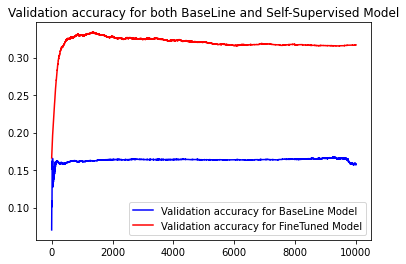

In [ ]:
epochs = range(1, 10001)

plt.figure()
plt.plot(epochs, val_acc1, 'b-', label='Validation accuracy for BaseLine Model')
plt.plot(epochs, val_acc2, 'r-', label='Validation accuracy for FineTuned Model')
plt.title('Validation accuracy for both BaseLine and Self-Supervised Model')
plt.legend()

plt.show()

Q3: Speech Denoising Using RNN

In [ ]:
!unzip '/content/drive/MyDrive/DLS_DATA/homework3.zip' -d '/content/drive/MyDrive/DLS_DATA/timit-hw3'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/DLS_DATA/timit-hw3/timit-homework/v/vs0597.wav  
  inflating: /content/drive/MyDrive/DLS_DATA/timit-hw3/timit-homework/v/vx0532.wav  
  inflating: /content/drive/MyDrive/DLS_DATA/timit-hw3/timit-homework/v/vn0744.wav  
  inflating: /content/drive/MyDrive/DLS_DATA/timit-hw3/timit-homework/v/vx1162.wav  
  inflating: /content/drive/MyDrive/DLS_DATA/timit-hw3/timit-homework/v/vn0022.wav  
  inflating: /content/drive/MyDrive/DLS_DATA/timit-hw3/timit-homework/v/vn0036.wav  
  inflating: /content/drive/MyDrive/DLS_DATA/timit-hw3/timit-homework/v/vx1176.wav  
  inflating: /content/drive/MyDrive/DLS_DATA/timit-hw3/timit-homework/v/vx0268.wav  
  inflating: /content/drive/MyDrive/DLS_DATA/timit-hw3/timit-homework/v/vn0988.wav  
  inflating: /content/drive/MyDrive/DLS_DATA/timit-hw3/timit-homework/v/vn0750.wav  
  inflating: /content/drive/MyDrive/DLS_DATA/timit-hw3/timit-homework/v/vs0540.wav  
  inflating: /

In [3]:
path = '/content/drive/MyDrive/DLS_DATA/timit-hw3/timit-homework/tr'

X = []
S = []
N = []

for f in os.listdir(path):
    if(os.path.isfile(os.path.join(path,f))):
        if(f[:3]=='trn'):
          s, sr = librosa.load(os.path.join(path,f),sr=None)
          trn_stft=librosa.stft(s, n_fft=1024, hop_length=512)
          N.append(abs(trn_stft))
        elif(f[:3]=='trs'):
          s, sr = librosa.load(os.path.join(path,f),sr=None)
          trs_stft=librosa.stft(s, n_fft=1024, hop_length=512)
          S.append(abs(trs_stft))
        else:
          s, sr = librosa.load(os.path.join(path,f),sr=None)
          trx_stft=librosa.stft(s, n_fft=1024, hop_length=512)
          X.append(abs(trx_stft))

In [4]:
print(N[-1].shape)
print(S[-1].shape)
print(X[-1].shape)

(513, 105)
(513, 95)
(513, 111)


In [5]:
max_len = X[0].shape[1]
for k in range(1,len(X)):
    if(X[k].shape[1]>max_len):
        max_len = X[k].shape[1]
print(max_len)
max_len = 180

178


In [6]:
M_arr = []
for i in range(len(N)):
    if(S[i].shape[1]<N[i].shape[1]):
        S[i] = np.pad(S[i],((0,0),(0,N[i].shape[1]-S[i].shape[1])),mode='constant')
    elif(S[i].shape[1]>N[i].shape[1]):
        N[i] = np.pad(N[i],((0,0),(0,S[i].shape[1]-N[i].shape[1])),mode='constant')
    M = np.where((S[i]>N[i]),1,0)
    M_arr.append(M)

In [7]:
for i in range(len(X)):
    X[i] = np.pad(X[i],((0,0),(0,max_len-X[i].shape[1])),mode='constant')
    X[i] = X[i].T
    M_arr[i] = np.pad(M_arr[i],((0,0),(0,max_len-M_arr[i].shape[1])),mode='constant')
    M_arr[i] = M_arr[i].T

In [8]:
print(M_arr[0].shape)
print(M_arr[1].shape)

(180, 513)
(180, 513)


In [9]:
X = np.dstack(X)
X = np.rollaxis(X,-1)
M_arr = np.dstack(M_arr)
M_arr = np.rollaxis(M_arr,-1)
print(X.shape)
print(M_arr.shape)

(1200, 180, 513)
(1200, 180, 513)


In [10]:
X = tf.convert_to_tensor(X, dtype=tf.float32)
M_arr = tf.convert_to_tensor(M_arr, dtype=tf.float32)
print(X.shape)
print(M_arr.shape)

(1200, 180, 513)
(1200, 180, 513)


In [11]:
he_initializer = tf.keras.initializers.HeUniform(seed=None)
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(513, activation='relu', return_sequences=True,kernel_initializer=he_initializer))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(513, activation='relu', return_sequences=True,kernel_initializer=he_initializer))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(513, activation='relu',kernel_initializer=he_initializer))

model.add(tf.keras.layers.Activation(tf.nn.sigmoid))
model.add(tf.keras.layers.Activation(tf.nn.relu))
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (10, 180, 513)            2107404   
                                                                 
 dropout (Dropout)           (10, 180, 513)            0         
                                                                 
 lstm_1 (LSTM)               (10, 180, 513)            2107404   
                                                                 
 dropout_1 (Dropout)         (10, 180, 513)            0         
                                                                 
 dense (Dense)               (10, 180, 513)            263682    
                                                                 
 activation (Activation)     (10, 180, 513)            0         
                                                                 
 activation_1 (Activation)   (10, 180, 513)            0

In [13]:
model.fit(X,M_arr,batch_size=10,epochs=10,verbose=1)

Epoch 1/10
120/120 [==============================] - 66s 519ms/step - loss: 0.2500 - accuracy: 0.3493
Epoch 2/10
120/120 [==============================] - 43s 355ms/step - loss: 0.2500 - accuracy: 0.3983
Epoch 3/10
120/120 [==============================] - 45s 374ms/step - loss: 0.2500 - accuracy: 0.4260
Epoch 4/10
120/120 [==============================] - 43s 355ms/step - loss: 0.2500 - accuracy: 0.4329
Epoch 5/10
120/120 [==============================] - 45s 374ms/step - loss: 0.2500 - accuracy: 0.4356
Epoch 6/10
120/120 [==============================] - 43s 359ms/step - loss: nan - accuracy: 0.5430
Epoch 7/10
120/120 [==============================] - 43s 358ms/step - loss: nan - accuracy: 0.7088
Epoch 8/10
120/120 [==============================] - 46s 381ms/step - loss: nan - accuracy: 0.7088
Epoch 9/10
120/120 [==============================] - 43s 359ms/step - loss: nan - accuracy: 0.7088
Epoch 10/10
120/120 [==============================] - 51s 428ms/step - loss: nan - a

# Validation Dataset

In [15]:
val_path = '/content/drive/MyDrive/DLS_DATA/timit-hw3/timit-homework/v'

Val_X = []
Val_S = []
Val_X_abs = []
Val_N = []

for f in os.listdir(val_path):
    if(os.path.isfile(os.path.join(val_path,f))):
        if(f[:2]=='vn'):
          s, sr = librosa.load(os.path.join(val_path,f),sr=None)
          val_n_stft=librosa.stft(s, n_fft=1024, hop_length=512)
          Val_N.append(abs(val_n_stft))
        elif(f[:2]=='vs'):
          s, sr = librosa.load(os.path.join(val_path,f),sr=None)
          val_s_stft=librosa.stft(s, n_fft=1024, hop_length=512)
          Val_S.append(abs(val_s_stft))
        else:
          s, sr = librosa.load(os.path.join(val_path,f),sr=None)
          val_x_stft=librosa.stft(s, n_fft=1024, hop_length=512)
          Val_X.append(val_x_stft)
          Val_X_abs.append(abs(val_x_stft))

In [16]:
val_max_len = 180

In [17]:
for i in range(len(Val_X)):
      Val_X[i] = np.pad(Val_X[i],((0,0),(0,val_max_len-Val_X[i].shape[1])),mode='constant')
      Val_X[i] = Val_X[i].T
      Val_S[i] = np.pad(Val_S[i],((0,0),(0,val_max_len-Val_S[i].shape[1])),mode='constant')
      Val_S[i] = Val_S[i].T
      Val_X_abs[i] = np.pad(Val_X_abs[i],((0,0),(0,val_max_len-Val_X_abs[i].shape[1])),mode='constant')
      Val_X_abs[i] = Val_X_abs[i].T

In [18]:
Val_X = np.dstack(Val_X)
Val_X = np.rollaxis(Val_X,-1)
Val_X_abs = np.dstack(Val_X_abs)
Val_X_abs = np.rollaxis(Val_X_abs,-1)
Val_S = np.dstack(Val_S)
Val_S = np.rollaxis(Val_S,-1)

In [19]:
print(Val_X_abs.shape)
print(Val_X.shape)

(1200, 180, 513)
(1200, 180, 513)


In [28]:
Val_M_hat_arr = model.predict(tf.convert_to_tensor(Val_X_abs),batch_size=10)

120/120 [==============================] - 7s 62ms/step


In [29]:
Val_M_hat_arr = 1 * (Val_M_hat_arr > 0.5)
print(Val_M_hat_arr.shape)

(1200, 180, 513)


In [ ]:
Val_S_hat_arr = Val_M_hat_arr*Val_X

In [23]:
print(Val_S.shape)
print(Val_S_hat_arr.shape)

(1200, 180, 513)
(1200, 180, 513)


In [24]:
Val_S_hat_noabs = np.divide(Val_X,(Val_X_abs+1e-20))*Val_S_hat_arr
print(Val_S_hat_noabs.shape)

(1200, 180, 513)


In [26]:
snr = []
for i in range(Val_S.shape[0]):
      s_t = istft(Val_S[i], hop_length=512)
      shat_t = istft(Val_S_hat_noabs[i], hop_length=512)
      s = sum((s_t)**2)
      diff = sum(np.subtract(s_t,shat_t)**2)+1e-20
      SNR = 10*np.log10(np.divide(s,diff))
      snr.append(SNR)
      print("SNR Value for {}th Sample:".format(i),SNR)

SNR Value for 0th Sample: -8.961328809437218e-09
SNR Value for 1th Sample: -2.0827633390686772e-08
SNR Value for 2th Sample: 2.856127731603965e-09
SNR Value for 3th Sample: 1.625323507507722e-08
SNR Value for 4th Sample: -1.1532869047755975e-08
SNR Value for 5th Sample: -2.9145227367089706e-08
SNR Value for 6th Sample: 4.4239486853345364e-10
SNR Value for 7th Sample: -8.07667070128911e-09
SNR Value for 8th Sample: 5.894041796134123e-09
SNR Value for 9th Sample: -1.7891048429372694e-08
SNR Value for 10th Sample: 1.5116472361025175e-08
SNR Value for 11th Sample: 4.5608928288456033e-10
SNR Value for 12th Sample: 2.8864432855171066e-08
SNR Value for 13th Sample: -1.7891048429372694e-08
SNR Value for 14th Sample: 2.2791753285283318e-08
SNR Value for 15th Sample: 3.0300586549909797e-09
SNR Value for 16th Sample: 1.5031291387545242e-08
SNR Value for 17th Sample: -2.561801207424025e-08
SNR Value for 18th Sample: 1.4608829169164544e-08
SNR Value for 19th Sample: -1.0420759840633736e-08
SNR Valu

# Test DataSet:

In [27]:
print("Mean SNR Value is:",sum(snr)/len(snr))

Mean SNR Value is: 2.6983367978555895e-10
